<a href="https://colab.research.google.com/github/NataliaMak20/ML/blob/main/Keras_and_Tensorflow_for_Fashion_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
from tensorflow import keras

In [53]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [57]:
batch_size = 128
epochs = 10
wandb.init(project="fashion",
           config={"batch_size": batch_size, "epochs": epochs})

In [4]:
print(tf.__version__)

2.9.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
mnist = keras.datasets.fashion_mnist

In [7]:
#Type of the dataset is module 
type(mnist)

module

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
#The way the datset is organized
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [10]:
#60000 number of rows
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
#Total 70000 rows, 10000 used in test and 60000 used in train
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [12]:
#255 is the values of the image
np.max(X_train)

255

In [13]:
np.mean(X_train)

72.94035223214286

In [14]:
#total 10 classes
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

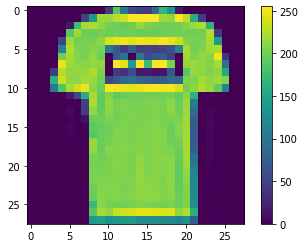

In [18]:
#random one image
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
X_train = X_train/255.0

In [21]:
X_test = X_test/255.0

In [22]:
np.max(X_train)

1.0

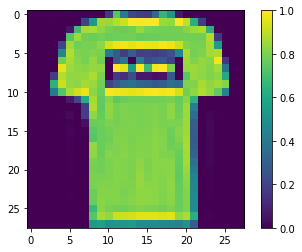

In [23]:
#Color is not changed
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [25]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [26]:
#all parameters are possible to train
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Model compilation
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [28]:
#training data 10 time
#almost 91% accuracy on the training set
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4837 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3614 - accuracy: 0.8672
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3286 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3055 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2897 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2755 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2618 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2522 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2416 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.233

In [29]:
#87% accuracy on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8841
0.8841000199317932


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [32]:
accuracy_score(y_test, y_pred)

0.8841

In [33]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [34]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [35]:
pred

array([[5.5148654e-08, 6.4818443e-05, 4.4624022e-07, ..., 2.9594369e-02,
        6.4947017e-07, 9.6771896e-01],
       [1.9353095e-06, 1.2374276e-14, 9.9904162e-01, ..., 2.1146866e-17,
        2.0429031e-10, 1.6900635e-14],
       [1.1866655e-13, 9.9999994e-01, 2.5730257e-17, ..., 5.3091595e-30,
        9.7339788e-16, 1.7206882e-23],
       ...,
       [7.9895710e-07, 2.3125104e-11, 3.6309464e-07, ..., 1.1403648e-11,
        9.9996036e-01, 1.4928803e-12],
       [5.0219204e-13, 9.9999994e-01, 6.3273734e-14, ..., 3.7806201e-21,
        3.7914693e-12, 5.9718813e-18],
       [8.2284430e-05, 2.4188049e-07, 1.3649478e-04, ..., 4.4325308e-04,
        8.2965162e-05, 9.5228806e-06]], dtype=float32)

In [36]:
#probability 
pred[0]

array([5.5148654e-08, 6.4818443e-05, 4.4624022e-07, 1.7282502e-05,
       4.3143341e-06, 2.5974498e-03, 1.6464325e-06, 2.9594369e-02,
       6.4947017e-07, 9.6771896e-01], dtype=float32)

In [38]:
class_names

['top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [37]:
np.argmax(pred[0])

9

In [40]:
np.argmax(pred[1])

2

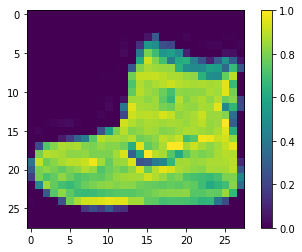

In [42]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [43]:
pred = np.argmax(model.predict(X_test[0].reshape(1,-1)))
pred

1/1 [==============================] - 0s 61ms/step


9

In [44]:
class_names[pred]

'ankle boot'

In [46]:
model.save('model')
model.save_weights('model.h5')

In [47]:
model1 = keras.models.load_model('model')
model1.load_weights('model.h5')
